<a href="https://colab.research.google.com/github/Marcelooyola/Modulo7/blob/main/tf_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo](https://github.com/cristiandarioortegayubro/BA/blob/main/dba.png?raw=true)

# **Trabajo Final - Módulo 7 - Aprendizaje Automático - Machine Learning - Regresión**

![logo](https://www.python.org/static/community_logos/python-powered-w-100x40.png)


#Alumno:
##**Oyola Marcelo**


**En virtud del DataFrame propuesto, generar un modelo de regresión para predecir el precio de viviendas de Argentina:**

- **l1** - país
- **l2** - provincia o ciudad
- **l3** - barrio
- **rooms** - cantidad de habitaciones
- **bedrooms** - cantidad de dormitorios
- **bathrooms** - cantidad de baños
- **surface_total** - superficie total
- **surface_covered** - superficie cubierta
- **price** - precio

# **Carga de módulos y datos necesarios**

In [1]:
import pandas as pd

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# **Creación del DataFrame**

In [2]:
url="https://raw.githubusercontent.com/cristiandarioortegayubro/BA/main/Datasets/"
archivo="propiedades.csv"
regresion = pd.read_csv(url+archivo, index_col=0)

In [3]:
regresion.head()

,id,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,0,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,80.0,NaN,235000
1,1,Argentina,Capital Federal,Belgrano,NaN,NaN,1.0,NaN,40.0,105000
2,2,Argentina,Capital Federal,San Telmo,1.0,NaN,1.0,34.0,31.0,109183
3,3,Argentina,Capital Federal,Villa Urquiza,2.0,NaN,1.0,NaN,51.0,110000
4,4,Argentina,Capital Federal,Belgrano,6.0,4.0,2.0,190.0,178.0,550000


#Preprocesamiento de datos

In [4]:
for i in regresion.columns:
  print(f"{regresion[i].describe()}")

count    44678.000
mean     22338.500
std      12897.572
min          0.000
25%      11169.250
50%      22338.500
75%      33507.750
max      44677.000
Name: id, dtype: float64
count         44678
unique            1
top       Argentina
freq          44678
Name: l1, dtype: object
count               44678
unique                  1
top       Capital Federal
freq                44678
Name: l2, dtype: object
count       44382
unique         57
top       Palermo
freq         8569
Name: l3, dtype: object
count    43547.000000
mean         2.710933
std          1.348082
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         35.000000
Name: rooms, dtype: float64
count    38623.000000
mean         1.984258
std          1.637968
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max        153.000000
Name: bedrooms, dtype: float64
count    43371.000000
mean         1.531392
std          0.864967
min          1.000

In [5]:
regresion = regresion.drop(columns=["id","l1","l2"])
regresion.head()

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,Palermo,2.0,1.0,1.0,80.0,NaN,235000
1,Belgrano,NaN,NaN,1.0,NaN,40.0,105000
2,San Telmo,1.0,NaN,1.0,34.0,31.0,109183
3,Villa Urquiza,2.0,NaN,1.0,NaN,51.0,110000
4,Belgrano,6.0,4.0,2.0,190.0,178.0,550000


In [7]:
regresion.isnull().sum().sort_values(ascending = False)

bedrooms           6055
surface_total      4822
surface_covered    4037
bathrooms          1307
rooms              1131
l3                  296
price                 0
dtype: int64

In [11]:
for i in regresion.columns:
  print(f"Columna de datos -- {regresion[i].name}:")
  print(f"Cantidad de nulos: {regresion[i].isnull().sum()}")
  print(f"{regresion[i].describe()}")
  print(f"------------------------------------")

Columna de datos -- l3:
Cantidad de nulos: 296
count       44382
unique         57
top       Palermo
freq         8569
Name: l3, dtype: object
------------------------------------
Columna de datos -- rooms:
Cantidad de nulos: 1131
count    43547.000000
mean         2.710933
std          1.348082
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         35.000000
Name: rooms, dtype: float64
------------------------------------
Columna de datos -- bedrooms:
Cantidad de nulos: 6055
count    38623.000000
mean         1.984258
std          1.637968
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max        153.000000
Name: bedrooms, dtype: float64
------------------------------------
Columna de datos -- bathrooms:
Cantidad de nulos: 1307
count    43371.000000
mean         1.531392
std          0.864967
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         18.000000

## Division datos categoricos y numericos

In [12]:
regresion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44678 entries, 0 to 44677
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   l3               44382 non-null  object 
 1   rooms            43547 non-null  float64
 2   bedrooms         38623 non-null  float64
 3   bathrooms        43371 non-null  float64
 4   surface_total    39856 non-null  float64
 5   surface_covered  40641 non-null  float64
 6   price            44678 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.7+ MB


In [14]:
cols_numericas = list(regresion.select_dtypes(exclude=["object"]))
print(f"{cols_numericas}")

cols_categoricas = list(regresion.select_dtypes(include=["object"]))
print(f"{cols_categoricas}")

['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']
['l3']


##Analisis de outliers

In [22]:
import plotly.express as px

for i in regresion[cols_numericas]:
  fig = px.box(regresion, x=regresion[i],
               title='Diagrama de Caja de la Distribución: '+regresion[i].name)

# Configurar la etiqueta del eje x
  fig.update_xaxes(title_text='Valores')

# Mostrar el gráfico interactivo
  fig.show()

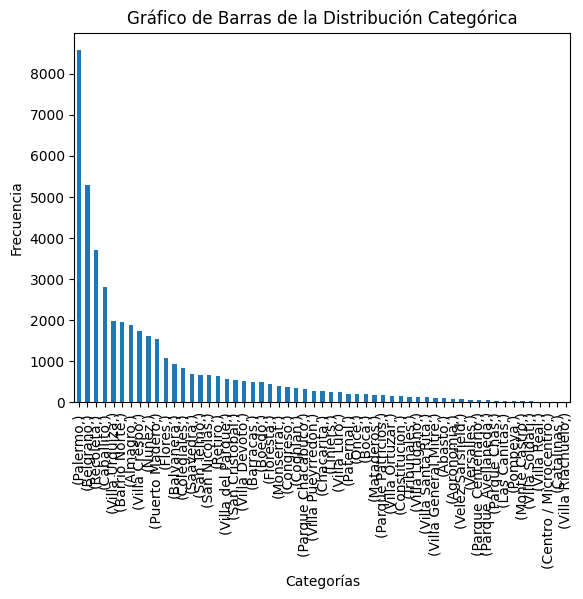

In [20]:
regresion[cols_categoricas].value_counts().plot(kind='bar')
plt.title('Gráfico de Barras de la Distribución Categórica')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.show()

In [23]:
regresion

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,Palermo,2.0,1.0,1.0,80.0,NaN,235000
1,Belgrano,NaN,NaN,1.0,NaN,40.0,105000
2,San Telmo,1.0,NaN,1.0,34.0,31.0,109183
3,Villa Urquiza,2.0,NaN,1.0,NaN,51.0,110000
4,Belgrano,6.0,4.0,2.0,190.0,178.0,550000
...,...,...,...,...,...,...,...
44673,Monte Castro,2.0,1.0,1.0,56.0,54.0,115000
44674,Barrio Norte,2.0,1.0,1.0,NaN,NaN,105000
44675,Colegiales,2.0,1.0,1.0,45.0,40.0,99000
44676,Colegiales,1.0,1.0,1.0,59.0,59.0,105000


In [30]:
regresion =regresion.query('''rooms <= 4 and bedrooms <= 6 and bathrooms <= 3 and surface_total <= 184 and surface_covered <= 165 and price <= 560500''').reset_index(drop=True)
regresion

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,Palermo,2.0,1.0,1.0,38.0,38.0,132000
1,Palermo,3.0,2.0,1.0,80.0,75.0,245000
2,Villa del Parque,1.0,1.0,1.0,44.0,41.0,86000
3,Villa Santa Rita,2.0,1.0,1.0,73.0,46.0,110000
4,Villa Urquiza,2.0,1.0,1.0,47.0,47.0,99000
...,...,...,...,...,...,...,...
27148,Villa Crespo,2.0,1.0,1.0,29.0,29.0,72000
27149,Monte Castro,2.0,1.0,1.0,56.0,54.0,115000
27150,Colegiales,2.0,1.0,1.0,45.0,40.0,99000
27151,Colegiales,1.0,1.0,1.0,59.0,59.0,105000


In [31]:
regresion.isna().sum()

l3                 200
rooms                0
bedrooms             0
bathrooms            0
surface_total        0
surface_covered      0
price                0
dtype: int64

In [32]:
for i in regresion[cols_numericas]:
  fig = px.box(regresion, x=regresion[i],
               title='Diagrama de Caja de la Distribución: '+regresion[i].name)

# Configurar la etiqueta del eje x
  fig.update_xaxes(title_text='Valores')

# Mostrar el gráfico interactivo
  fig.show()

##Eliminar nulos

In [33]:
regresion['l3'].fillna(regresion['l3'].mode()[0], inplace=True)
regresion

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,Palermo,2.0,1.0,1.0,38.0,38.0,132000
1,Palermo,3.0,2.0,1.0,80.0,75.0,245000
2,Villa del Parque,1.0,1.0,1.0,44.0,41.0,86000
3,Villa Santa Rita,2.0,1.0,1.0,73.0,46.0,110000
4,Villa Urquiza,2.0,1.0,1.0,47.0,47.0,99000
...,...,...,...,...,...,...,...
27148,Villa Crespo,2.0,1.0,1.0,29.0,29.0,72000
27149,Monte Castro,2.0,1.0,1.0,56.0,54.0,115000
27150,Colegiales,2.0,1.0,1.0,45.0,40.0,99000
27151,Colegiales,1.0,1.0,1.0,59.0,59.0,105000


# **Generación del modelo de regresión**

# **Conclusiones**